In [1]:
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
# from tfp.layers import OneHotCategorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Reshape
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.regularizers import L2
%matplotlib widget
import matplotlib.pyplot as plt

# import logging
# logging.getLogger("tensorflow").setLevel(logging.ERROR)
# tf.autograph.set_verbosity(0)

np.set_printoptions(precision=2)

2022-12-15 11:24:59.570348: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-15 11:25:00.013814: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-15 11:25:00.811165: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/humus/anaconda3/lib/
2022-12-15 11:25:00.811269: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: ca

In [2]:
tfd = tfp.distributions
tfpl = tfp.layers

In [3]:
from mnist import MNIST

mndata = MNIST('samples')

# images, labels = mndata.load_training()
# # or
# images, labels = mndata.load_testing()


In [4]:
# load training dataset
X_train, y_train = mndata.load_training()

In [5]:
X_train = np.array(X_train)

y_train = np.array(y_train)
y_train = y_train.reshape([-1, 1])
y_train.shape

(60000, 1)

In [6]:
X_test, y_test = mndata.load_testing()
X_test = np.array(X_test)

y_test = np.array(y_test)
y_test = y_test.reshape([-1, 1])
y_test.shape

(10000, 1)

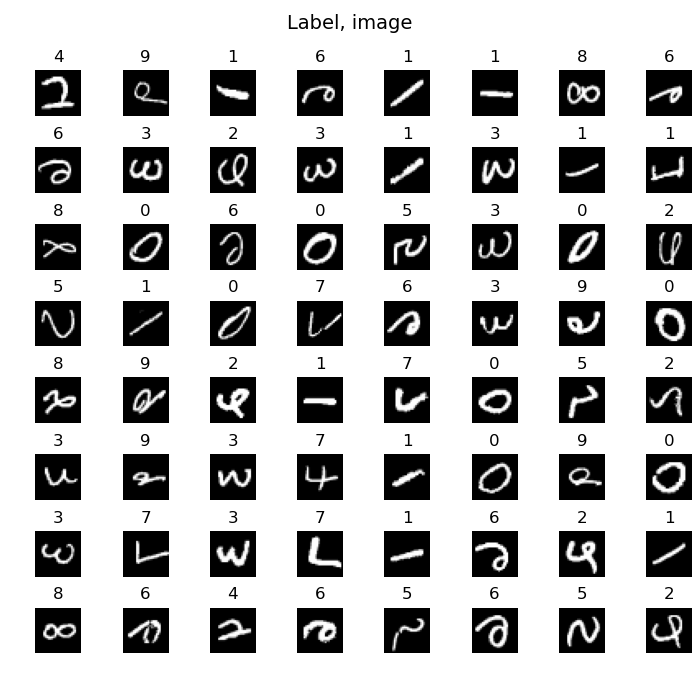

In [11]:
m, n = X_train.shape

fig, axes = plt.subplots(8,8, figsize=(7, 7))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Pick random images
    random_index = np.random.randint(m)
    
    X_random_reshaped = X_train[random_index].reshape((28,28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    # Display the label above the image
    ax.set_title(y_train[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [107]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        
    ], name = "my_model" 
)
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 25)                19625     
                                                                 
 dense_10 (Dense)            (None, 15)                390       
                                                                 
 dense_11 (Dense)            (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    loss=tf.keras.losses.MSLE(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

In [109]:
random_img = X[1024]

prediction = model.predict(random_img.reshape(1,784))  # prediction

print(f" predicting for : \n{y[1024]}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

1/1 [==============================] - 0s 70ms/step
 predicting for : 
[5]
 Largest Prediction index: 5


In [110]:
# find incorrect predictions
# errors = 0
# for train_idx in range(len(X_test)):
#     data_point = X[train_idx]
#     prediction = model.predict(data_point.reshape(1,784))  # prediction
#     predicted_digit = np.argmax(prediction);
#     actual_digit = y[train_idx]
#     if actual_digit != predicted_digit:
#         errors += 1

In [112]:
565 / len(X_test) * 100

5.65

In [113]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [114]:
predicted_digits = list(map(np.argmax, predictions))

In [115]:
errors = [0 if predicted == actual else 1 for (predicted, actual) in zip(predicted_digits, y_test)]

In [116]:
np.sum(errors) / len(errors) * 100

4.9